# Questionnaire Spatial Strategies FRS


## Import packages 

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.anova import *

In [2]:
# Data set loading
df_file = "/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/FRS/FRS.csv"
df = pd.read_csv(df_file, sep= ',')
df.describe()

,ID,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,...,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Alter
count,20.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,20.000000
mean,5721.050000,4.809524,4.454545,3.863636,4.090909,4.590909,2.454545,4.090909,4.409091,3.409091,...,4.727273,4.681818,4.409091,4.181818,4.590909,4.545455,2.681818,3.681818,3.772727,23.450000
std,2575.483613,1.503963,1.654065,1.833432,1.659291,1.563241,1.370689,1.874874,1.532477,1.708775,...,1.638287,1.460149,1.368318,1.622355,1.623022,1.682608,1.644221,1.249242,1.601541,4.773557
min,365.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000
25%,4126.000000,4.000000,3.000000,2.000000,3.000000,3.250000,1.000000,3.000000,3.250000,2.000000,...,3.250000,3.250000,3.000000,3.000000,3.250000,3.000000,1.000000,3.000000,3.000000,20.000000
50%,5636.000000,5.000000,5.000000,3.500000,4.000000,5.000000,2.000000,4.000000,5.000000,3.000000,...,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,3.000000,4.000000,3.500000,23.000000
75%,7519.500000,6.000000,6.000000,5.000000,5.750000,6.000000,3.750000,5.000000,5.000000,4.000000,...,6.000000,5.750000,5.750000,6.000000,6.000000,6.000000,3.000000,5.000000,5.000000,23.250000
max,9502.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,5.000000,7.000000,37.000000


## „Globale Einschätzung der Orientierungsfähigkeit mit Richtungs- und Wegstrategie“

In [3]:
df["Global"] = df[["Item1", "Item4", "Item5", "Item8", "Item10", "Item12", "Item13", "Item14", "Item15",
"Item18"]].mean(axis=1)
df["Global"].describe()

count    22.000000
mean      4.358081
std       1.161887
min       2.100000
25%       3.575000
50%       4.450000
75%       5.375000
max       5.800000
Name: Global, dtype: float64

## „Verwendung einer Überblicksstrategie“

In [4]:
df["Overview"] = df[["Item2", "Item3", "Item7", "Item9", "Item11", "Item16", "Item19"]].mean(axis=1)
df["Overview"].describe()

count    22.000000
mean      4.123377
std       1.406147
min       1.714286
25%       3.178571
50%       4.142857
75%       4.928571
max       6.857143
Name: Overview, dtype: float64

## „Kenntnis der Himmelsrichtungen“

In [5]:
df["Cardinal"] = df[["Item6", "Item17"]].mean(axis=1)
df["Cardinal"].describe()

count    22.000000
mean      2.568182
std       1.425077
min       1.000000
25%       1.125000
50%       2.500000
75%       3.875000
max       5.500000
Name: Cardinal, dtype: float64

In [6]:
df1 = df.iloc[:, [2,22,24,25,26]].copy()
FRSsubs= df1.dropna()
FRSsubs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        20 non-null     float64
 1   Alter     20 non-null     float64
 2   Global    20 non-null     float64
 3   Overview  20 non-null     float64
 4   Cardinal  20 non-null     float64
dtypes: float64(5)
memory usage: 960.0 bytes


In [7]:
FRSsubsLong = pd.melt(FRSsubs, id_vars=['ID'], value_vars=["Global", "Overview", "Cardinal"], var_name='Subscale', value_name='Average')
FRSsubsLong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        60 non-null     float64
 1   Subscale  60 non-null     object 
 2   Average   60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


## Export File to CSV

In [8]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
FRSsubs.to_csv('FRSsubs.csv')

## Plotting

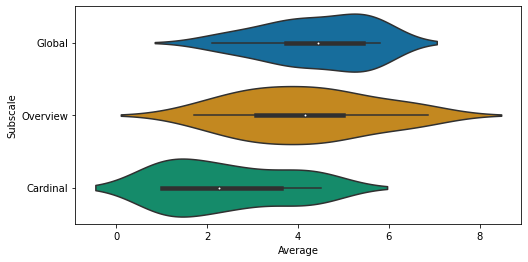

In [9]:
dy="Subscale"; dx="Average"; ort="H"; pal = sns.color_palette("Set2"); sigma = .2
sns.set_palette('colorblind')
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.violinplot(data= FRSsubsLong, x=dx, y=dy, scale="width")
plt.show()

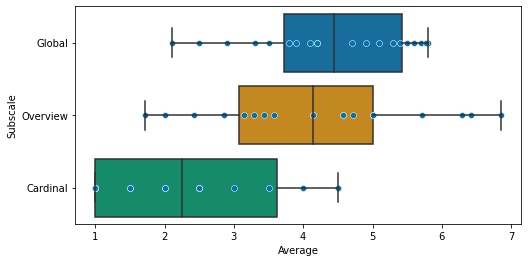

In [10]:
dy="Subscale"; dx="Average"; ort="H"; pal = sns.color_palette("Set2"); sigma = .2
sns.color_palette("Set2")
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
sns.boxplot(data= FRSsubsLong, x=dx, y=dy)
sns.scatterplot(data= FRSsubsLong, x=dx, y=dy)
plt.show()

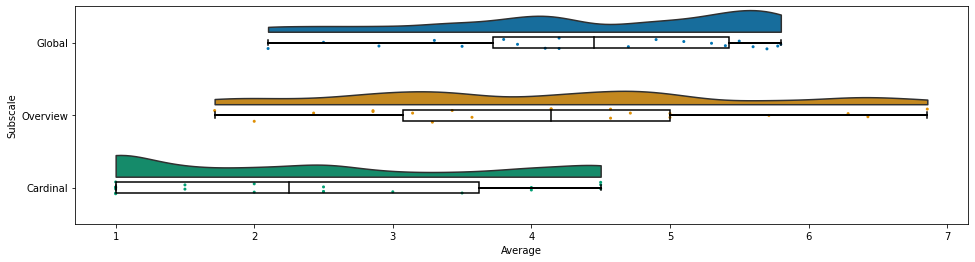

In [11]:

dy="Subscale"; dx="Average"; ort="h"; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(16, 4))

ax=pt.half_violinplot( x = dx, y = dy, data =
FRSsubsLong, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = FRSsubsLong, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = FRSsubsLong, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort) 